In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = sns.load_dataset("penguins")

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

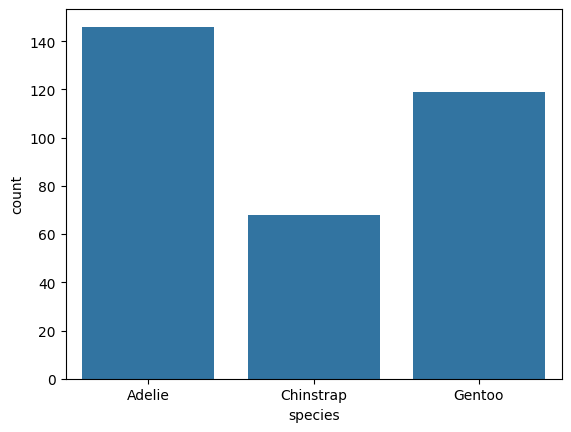

In [15]:
sns.countplot(x='species', data=df)

In [24]:
d = {'media' : [df['flipper_length_mm'].mean()],'desviacion_std' : [df['flipper_length_mm'].std()]}
descriptiva = pd.DataFrame(d)
descriptiva

,media,desviacion_std
0,200.966967,14.015765


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

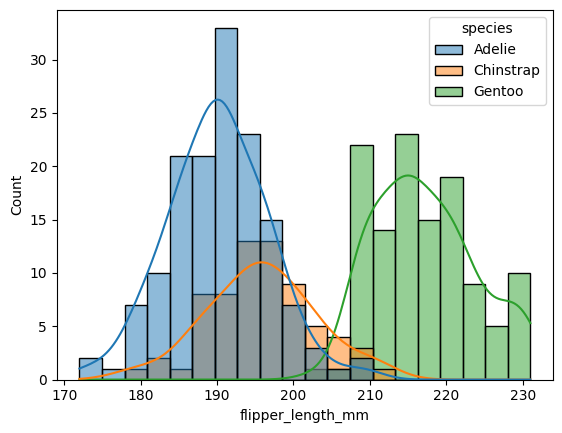

In [25]:
sns.histplot(x='flipper_length_mm', data=df, bins=20, kde=True, hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

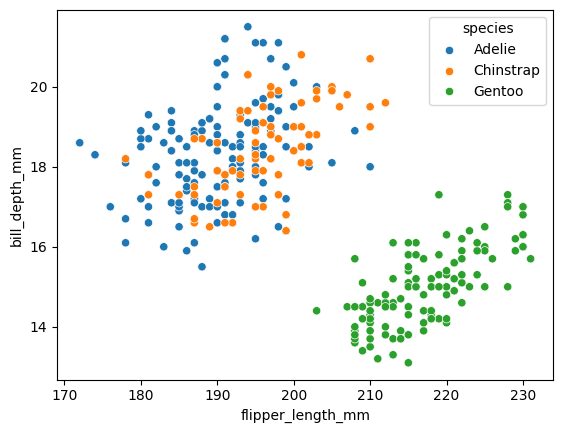

In [26]:
sns.scatterplot(x='flipper_length_mm', y='bill_depth_mm', data=df, hue='species')

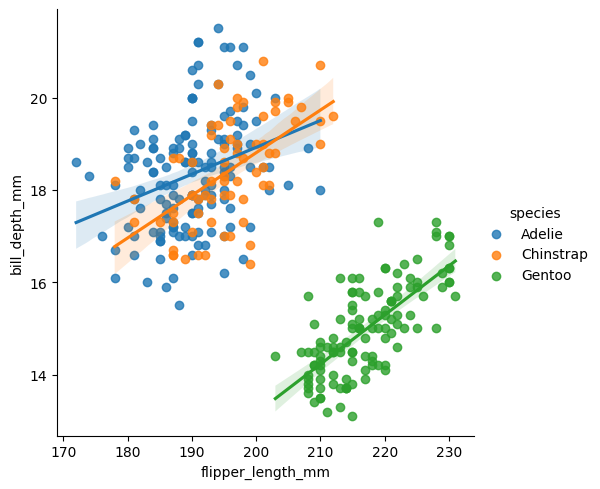

In [27]:
sns.lmplot(x='flipper_length_mm', y='bill_depth_mm', data=df, hue='species')

Text(0.5, 1.0, 'Boxplot de la masa corporal por especie')

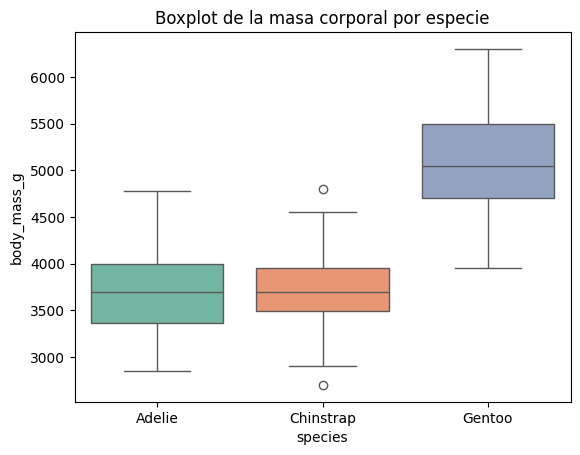

In [36]:
sns.boxplot(x='species', y='body_mass_g', data=df, hue='species', palette='Set2')
plt.title('Boxplot de la masa corporal por especie')

In [38]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [41]:
df.groupby('species').agg({'body_mass_g': ['mean'],'bill_length_mm': ['mean'],'bill_depth_mm': ['mean'],'flipper_length_mm': ['mean']}).reset_index()

,species,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
,,mean,mean,mean,mean
0,Adelie,3706.164384,38.823973,18.347260,190.102740
1,Chinstrap,3733.088235,48.833824,18.420588,195.823529
2,Gentoo,5092.436975,47.568067,14.996639,217.235294


In [45]:
df.groupby('island').count()['species']

island
Biscoe       163
Dream        123
Torgersen     47
Name: species, dtype: int64

In [47]:
df2 = df[df['body_mass_g']>df['body_mass_g'].mean()]